In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

import warnings
warnings.filterwarnings('ignore')

## Import Datasets

In [3]:
train_data = pd.read_csv("Z:\\Sasindu\\Data set\\Rain\\train.csv")
test_data = pd.read_csv("Z:\\Sasindu\\Data set\\Rain\\test.csv")

In [4]:
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

In [5]:
train_df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [6]:
test_df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             730 non-null    int64  
 1   day            730 non-null    int64  
 2   pressure       730 non-null    float64
 3   maxtemp        730 non-null    float64
 4   temparature    730 non-null    float64
 5   mintemp        730 non-null    float64
 6   dewpoint       730 non-null    float64
 7   humidity       730 non-null    float64
 8   cloud          730 non-null    float64
 9   sunshine       730 non-null    float64
 10  winddirection  729 non-null    float64
 11  windspeed      730 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 68.6 KB


### Check Null Values

In [9]:
train_df.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [10]:
test_df.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

## EDA

In [11]:
train_df.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


### Count Of unique values in each column

In [12]:
for col in train_df.columns:
    print(col,'---->',train_df[col].nunique())

id ----> 2190
day ----> 365
pressure ----> 236
maxtemp ----> 219
temparature ----> 198
mintemp ----> 199
dewpoint ----> 218
humidity ----> 49
cloud ----> 78
sunshine ----> 120
winddirection ----> 35
windspeed ----> 223
rainfall ----> 2


### Distribution of the variables

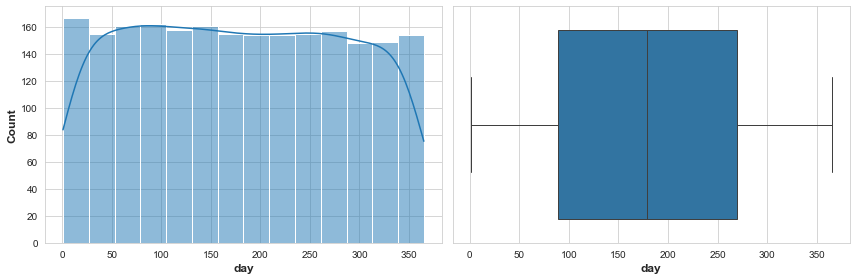

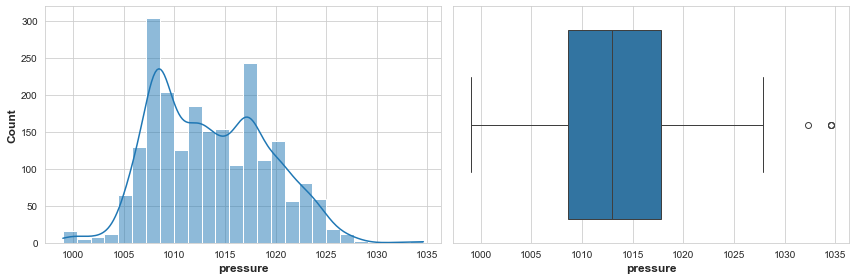

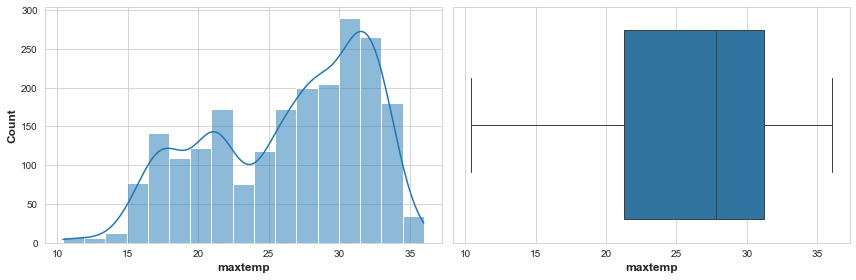

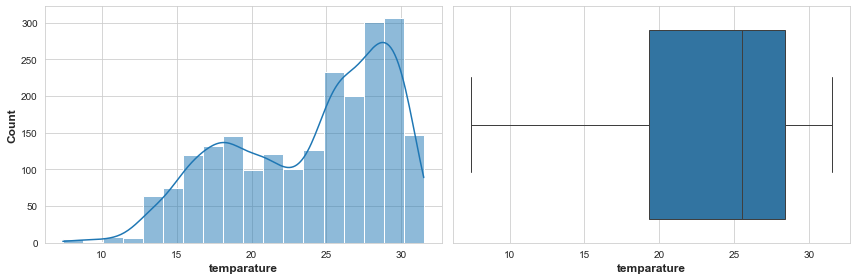

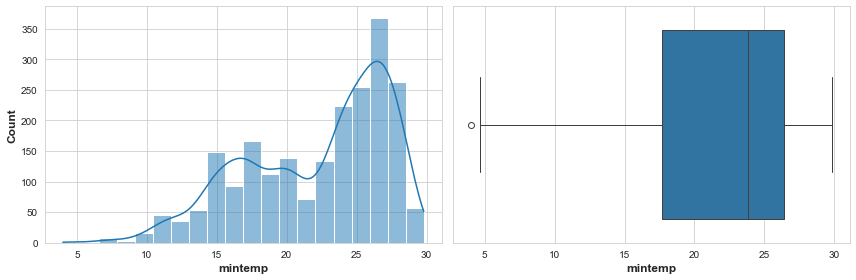

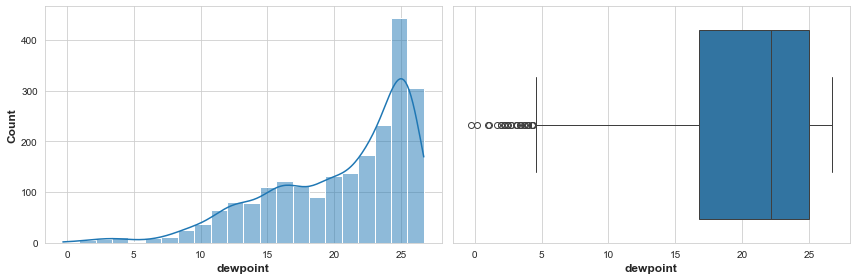

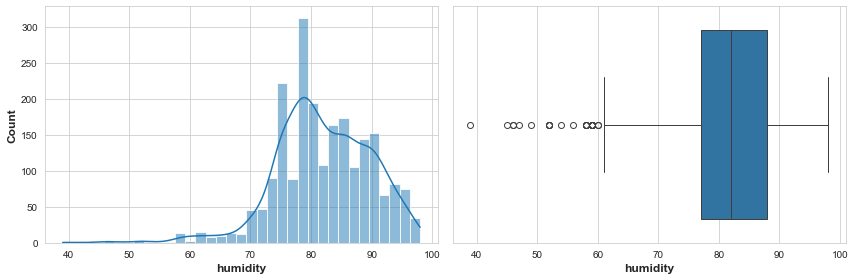

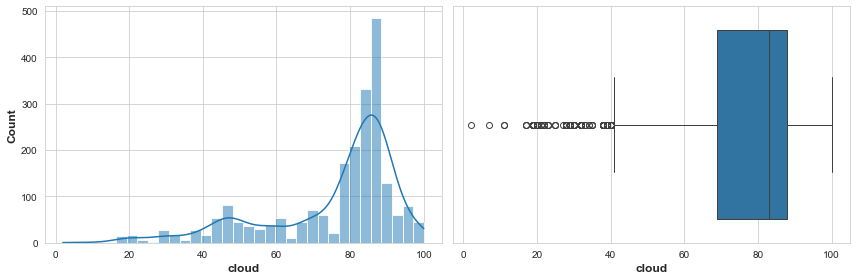

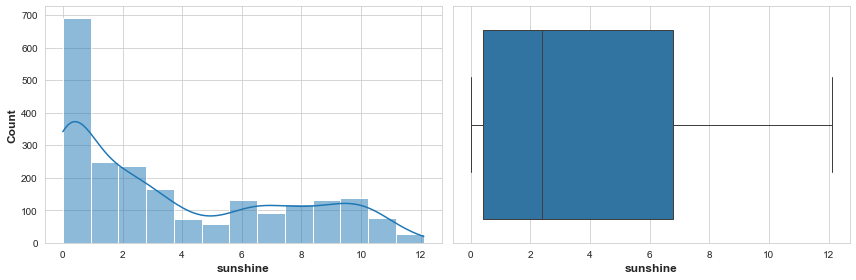

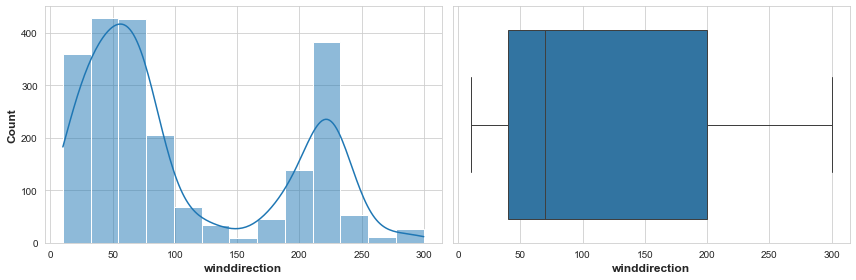

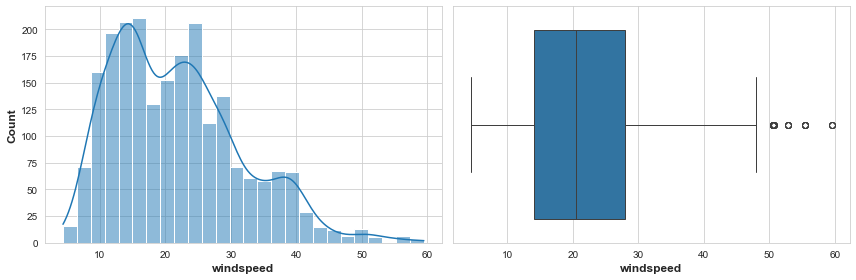

In [13]:
numeric_vals = ['day','pressure','maxtemp','temparature','mintemp',"dewpoint","humidity","cloud","sunshine","winddirection","windspeed"]

for col in numeric_vals:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(train_df[col], kde=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_df[col])
    plt.tight_layout()
    plt.show()

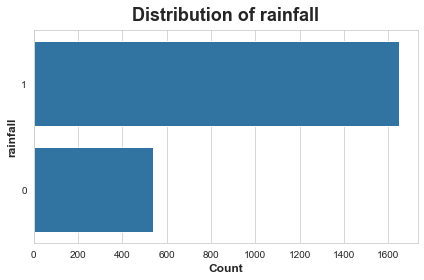

In [14]:
sns.countplot(y = "rainfall", data = train_df, order = train_df["rainfall"].value_counts().index)
plt.title(f'Distribution of rainfall')
plt.xlabel('Count')
plt.ylabel("rainfall")
plt.show()

#### The bar chart of class distribution reveals a class imbalance problem, where the majority class dominates the dataset. This imbalance increases the risk of the model being biased toward the majority class, potentially leading to poor performance on minority class predictions. To mitigate this issue, we can oversample the minority class using techniques such as Random Oversampling or SMOTE (Synthetic Minority Over-sampling Technique). Balancing the dataset helps improve the model's ability to generalize and ensures better performance across all classes.

### Visualize time series features

In [15]:
import plotnine as p9 
from plotnine import *

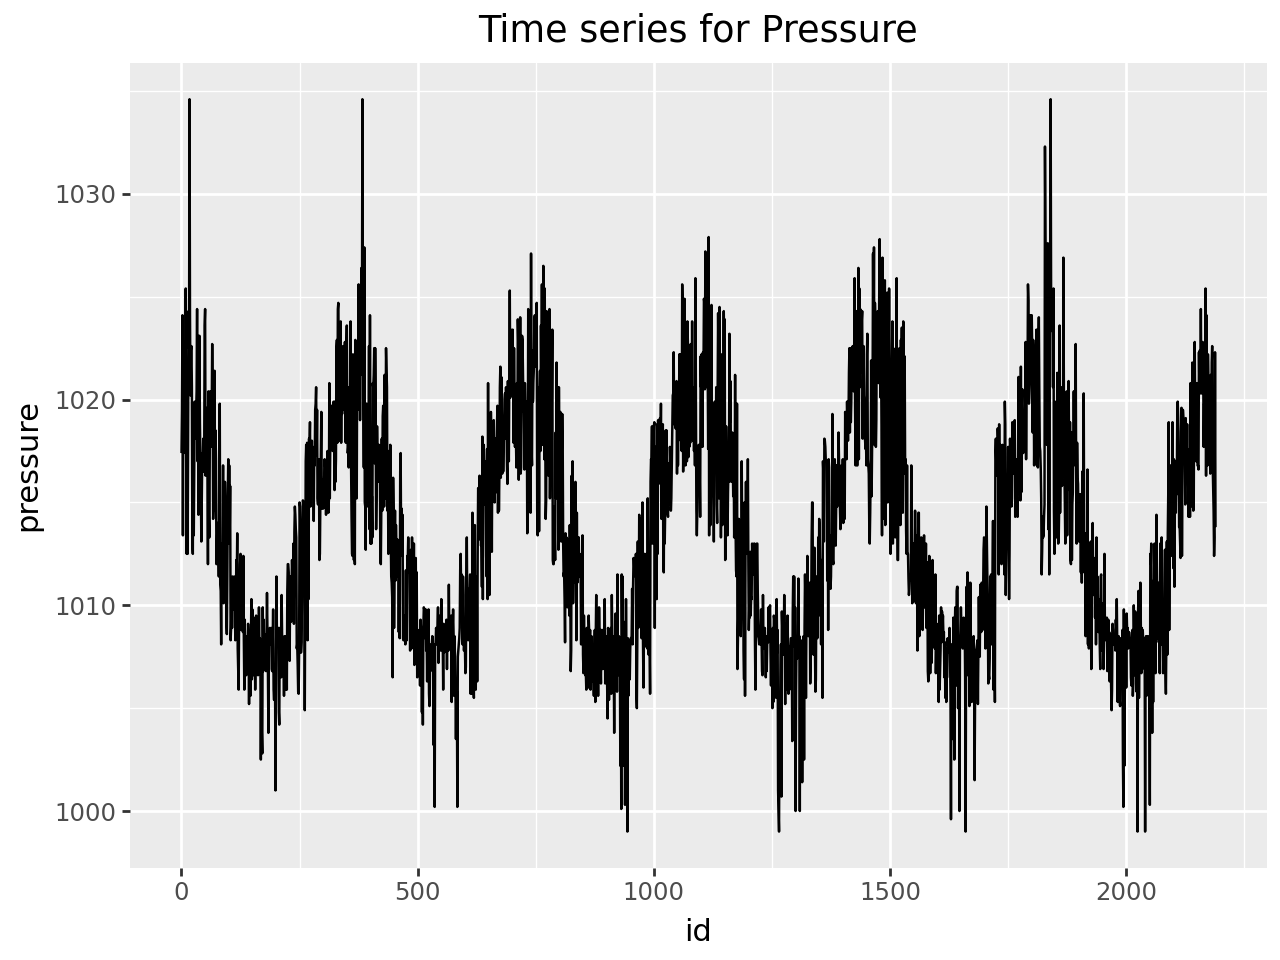

In [59]:
ggplot(train_df, aes(x='id', y='pressure')) + geom_line() + ggtitle("Time series for Pressure")

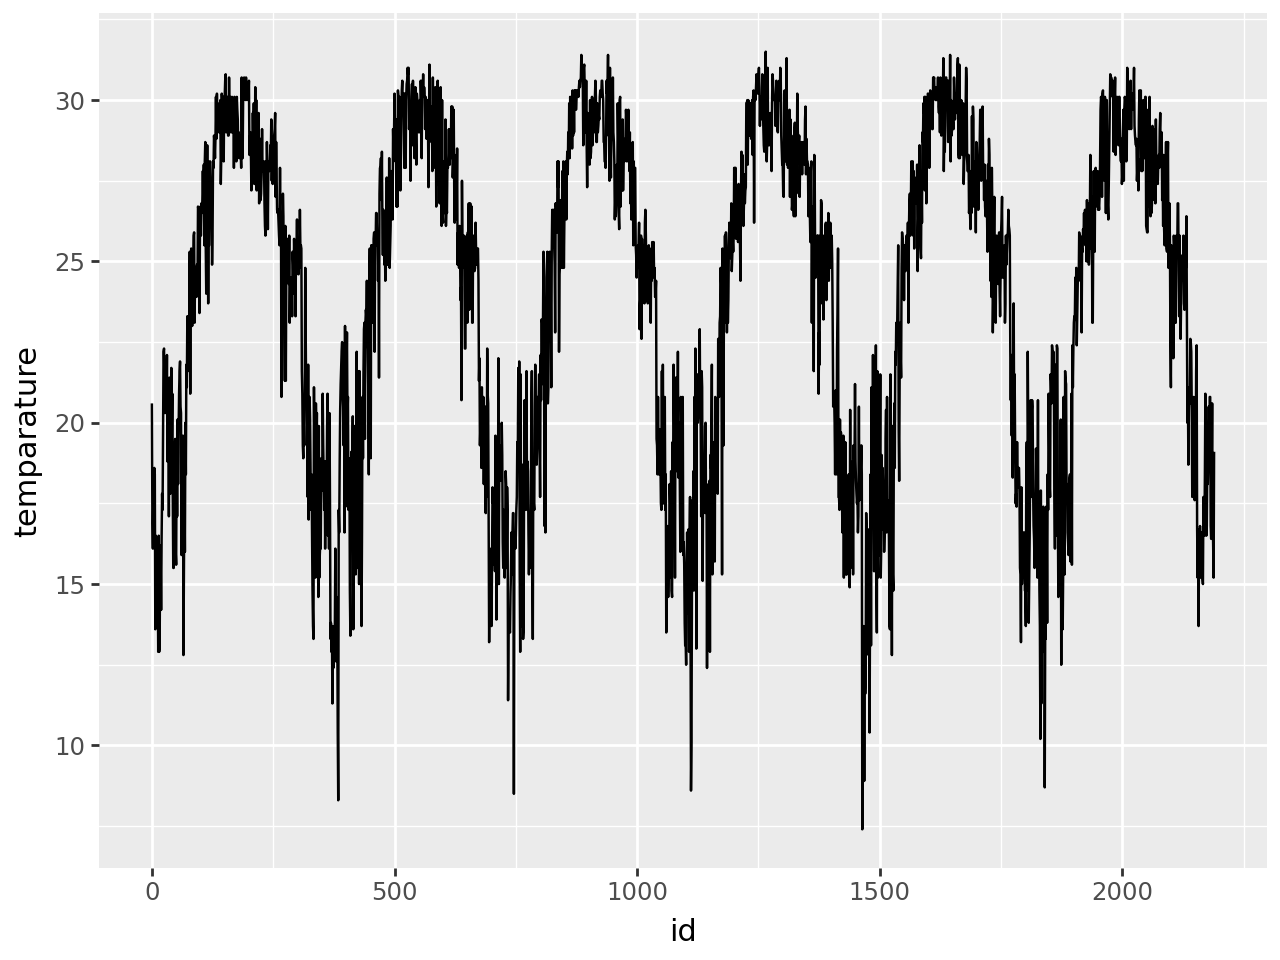

In [17]:
ggplot(train_df, aes(x='id', y='temparature')) + geom_line()

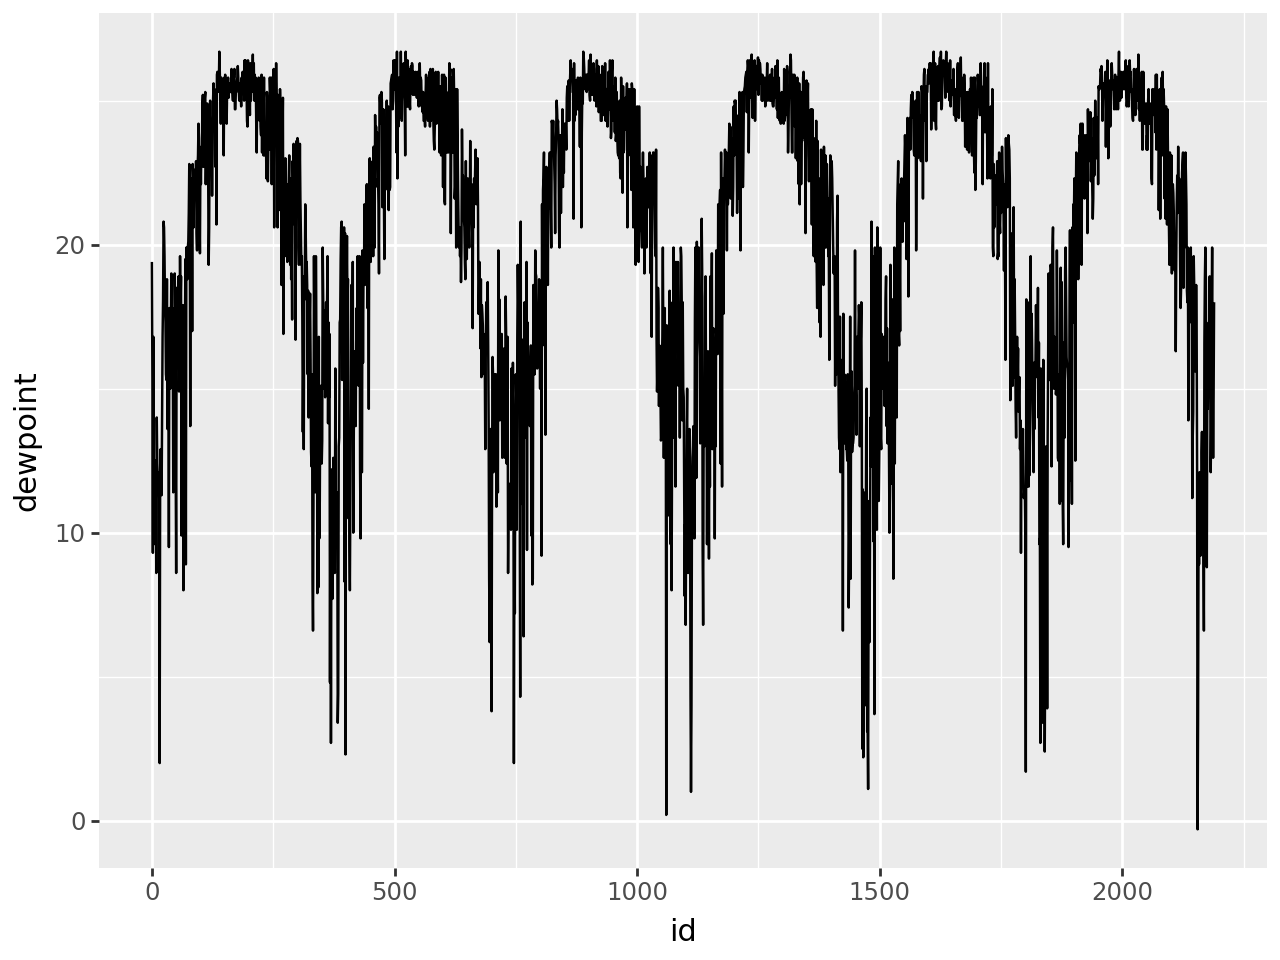

In [18]:
ggplot(train_df, aes(x='id', y='dewpoint')) + geom_line()

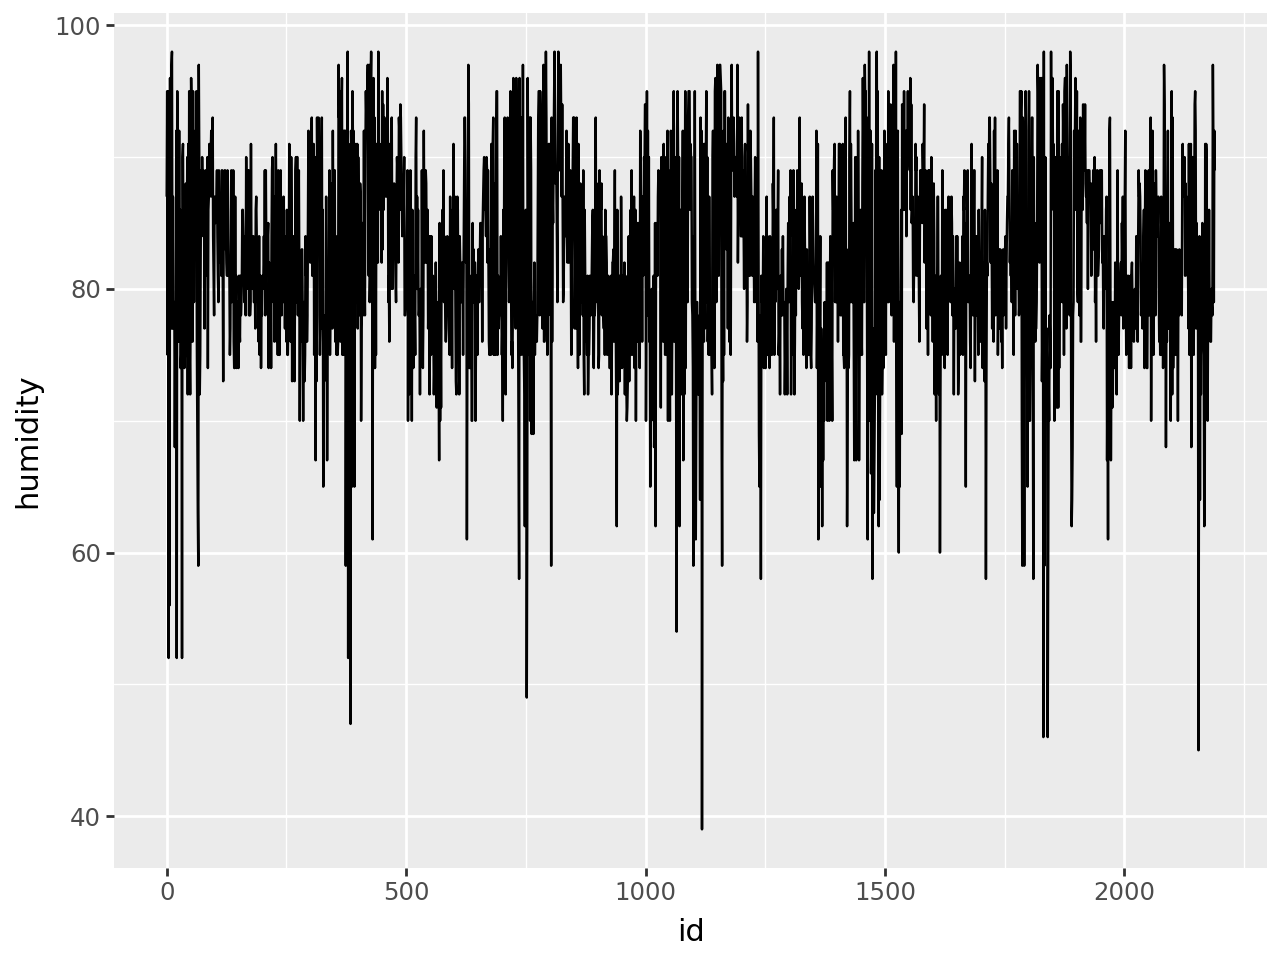

In [19]:
ggplot(train_df, aes(x='id', y='humidity')) + geom_line()

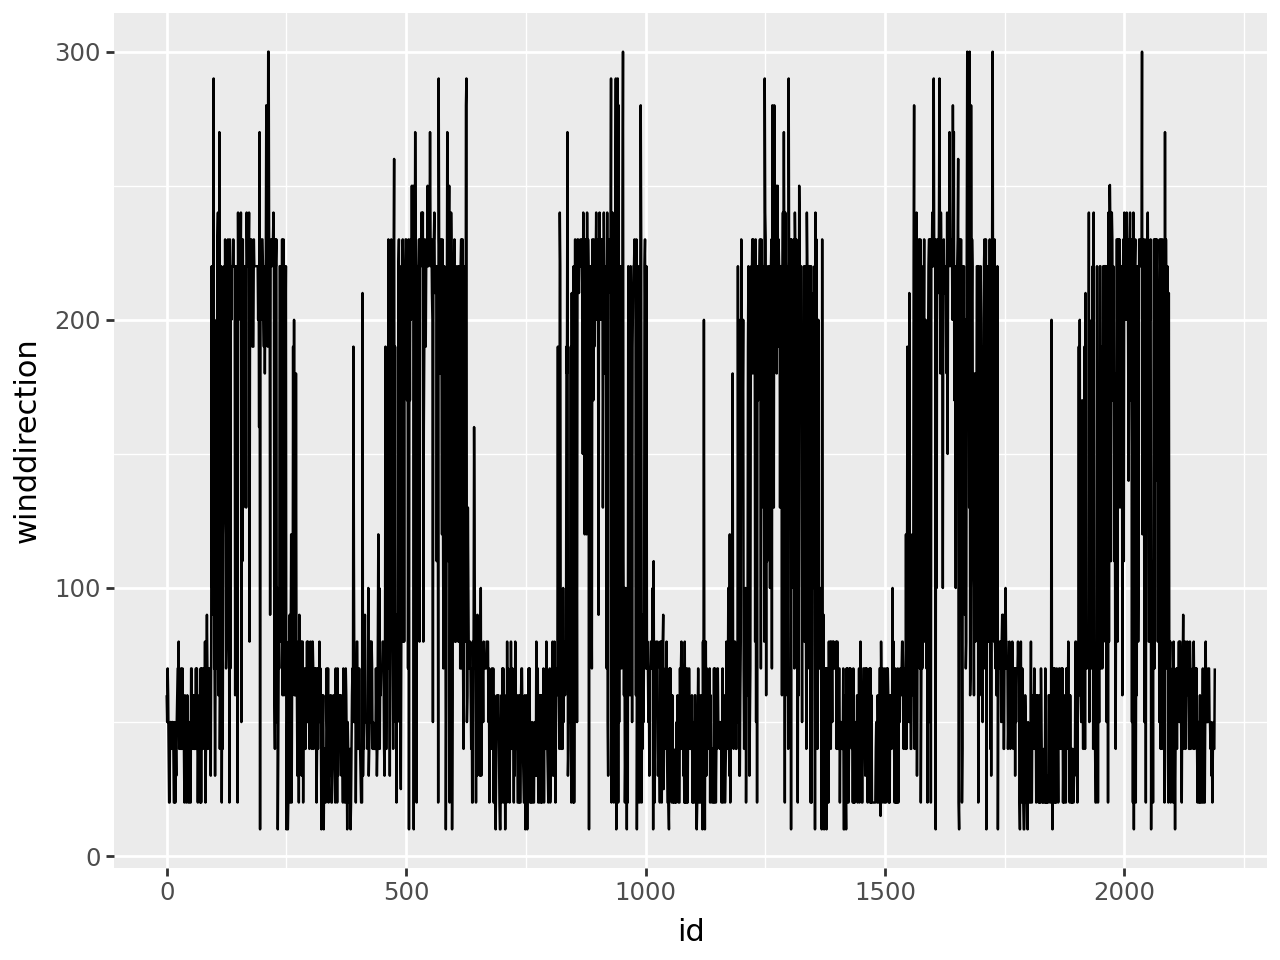

In [20]:
ggplot(train_df, aes(x='id', y='winddirection')) + geom_line()

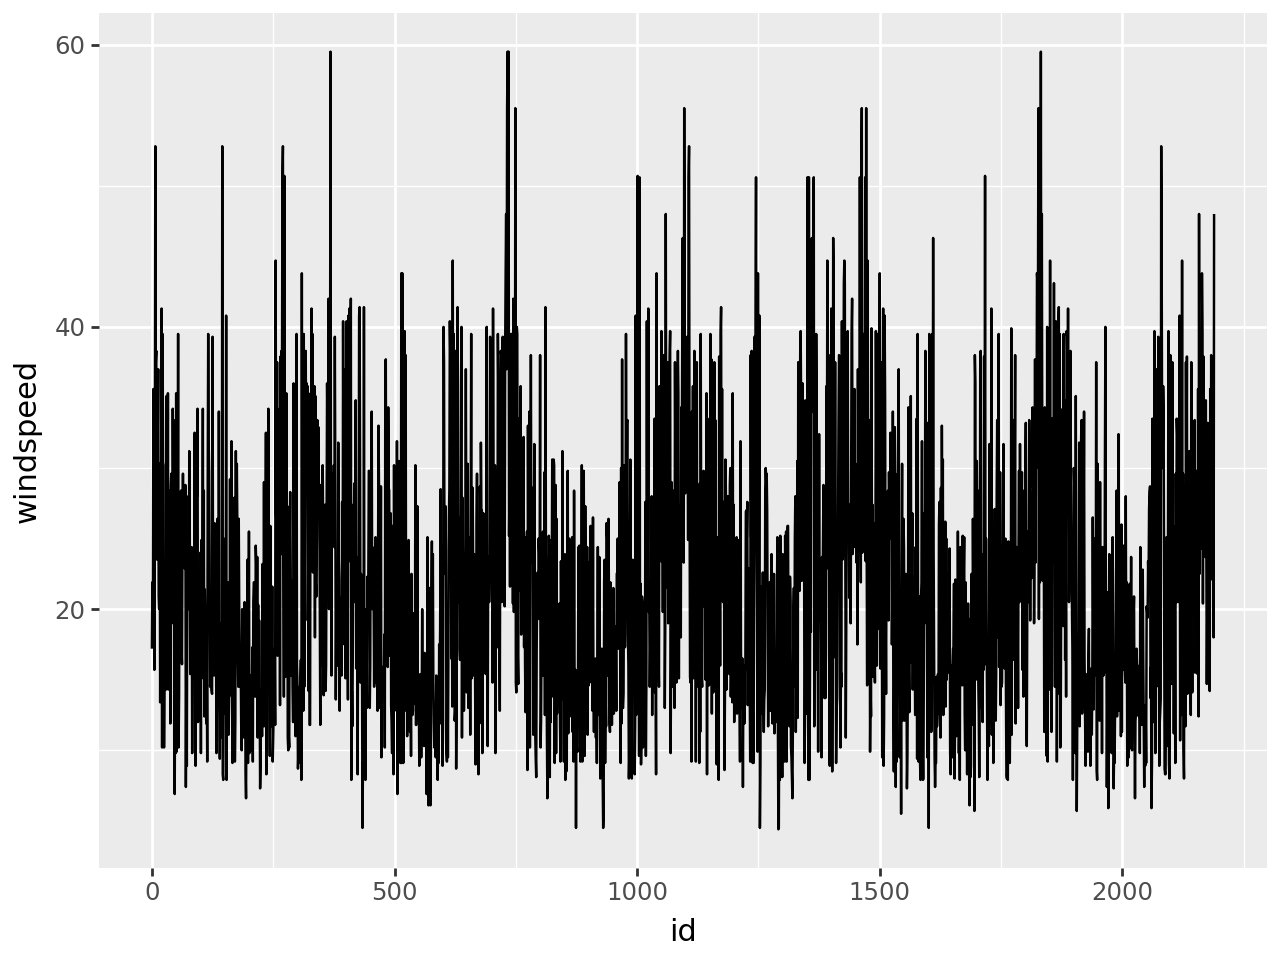

In [21]:
ggplot(train_df, aes(x='id', y='windspeed')) + geom_line()

### Handling Class Imbalance

In [22]:
from sklearn.utils import resample

In [24]:
majority = train_df[train_df.rainfall == 1]
minority = train_df[train_df.rainfall == 0]

minority_oversampled = resample(minority,
                               replace= True,
                               n_samples =len(majority),
                               random_state=42)

oversampled_data = pd.concat([majority,minority_oversampled])

oversampled_distribution = oversampled_data.rainfall.value_counts()
oversampled_distribution

rainfall
1    1650
0    1650
Name: count, dtype: int64

## Correlation Identification

In [25]:
numeric_df = oversampled_data.select_dtypes(include = ['number'])
corr_matrix = numeric_df.corr()

In [26]:
print(corr_matrix['rainfall'].sort_values(ascending = False).to_string())

rainfall         1.000000
cloud            0.644162
humidity         0.516238
windspeed        0.121343
dewpoint         0.083820
id               0.060613
day              0.016360
winddirection   -0.006312
mintemp         -0.030781
pressure        -0.045842
temparature     -0.058369
maxtemp         -0.093489
sunshine        -0.595660


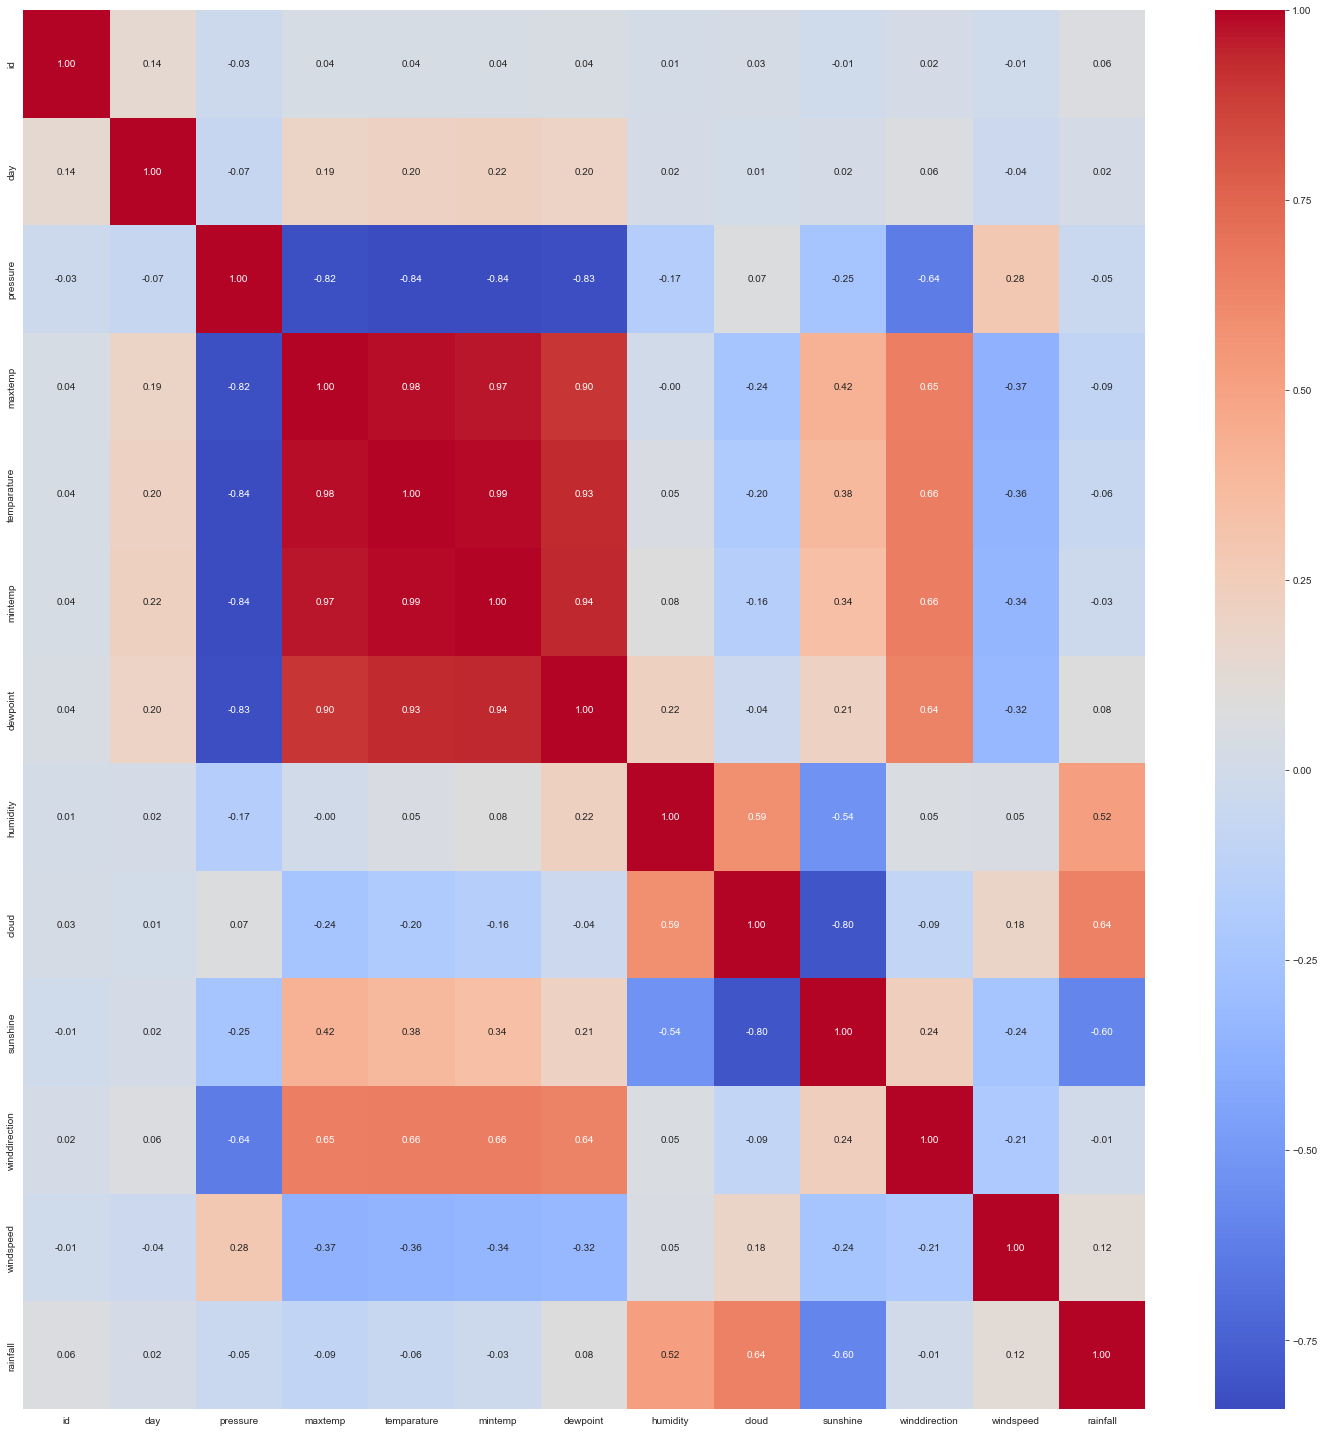

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True,cmap = 'coolwarm', fmt = ".2f")
plt.show()

### High Positive Correlation

In [28]:
High_correlate = corr_matrix[corr_matrix >= 0.75]

In [29]:
print(High_correlate[High_correlate<1.0].stack().to_string())

maxtemp      temparature    0.982742
             mintemp        0.965293
             dewpoint       0.903712
temparature  maxtemp        0.982742
             mintemp        0.987580
             dewpoint       0.930577
mintemp      maxtemp        0.965293
             temparature    0.987580
             dewpoint       0.941515
dewpoint     maxtemp        0.903712
             temparature    0.930577
             mintemp        0.941515


### High Negative Correlation

In [30]:
High_correlate_inverse = corr_matrix[corr_matrix <= -0.75]

In [31]:
print(High_correlate_inverse[High_correlate_inverse<1.0].stack().to_string())

pressure     maxtemp       -0.824572
             temparature   -0.840208
             mintemp       -0.836351
             dewpoint      -0.828433
maxtemp      pressure      -0.824572
temparature  pressure      -0.840208
mintemp      pressure      -0.836351
dewpoint     pressure      -0.828433
cloud        sunshine      -0.800034
sunshine     cloud         -0.800034


### Variance Inflation Factor (VIF) - Detecting Multicollinearity

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
oversampled_data.insert(0, 'Intercept', 1)

In [34]:
vif_data = pd.DataFrame()
vif_data["Feature"] = oversampled_data.columns
vif_data["VIF"] = [variance_inflation_factor(oversampled_data.values, i) for i in range(oversampled_data.shape[1])]

In [35]:
print(vif_data)

          Feature            VIF
0       Intercept  122830.297653
1              id       1.026421
2             day       1.133865
3        pressure       3.966966
4         maxtemp      33.259961
5     temparature      85.747637
6         mintemp      49.424105
7        dewpoint      11.516864
8        humidity       1.922600
9           cloud       3.396093
10       sunshine       3.676444
11  winddirection       1.877393
12      windspeed       1.179198
13       rainfall       1.898164


#### According to Multicollinearity Maxtemp, Mintemp,dewpoint variables were removed. And also Intercept,id columns were removed.

In [36]:
oversampled_data = oversampled_data.drop(columns= ['id',"Intercept",'maxtemp','mintemp','dewpoint'],axis=1)

In [37]:
oversampled_data.columns

Index(['day', 'pressure', 'temparature', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed', 'rainfall'],
      dtype='object')

In [38]:
x_oversampled_data = oversampled_data.drop('rainfall',axis = 1)
y_oversampled_data = oversampled_data["rainfall"]

## Split data into Train And Test

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_val,y_train,y_val = train_test_split(x_oversampled_data,y_oversampled_data,test_size = 0.3,random_state = 42)

## Scaling Data

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
mm = MinMaxScaler()
x_train_scaled = mm.fit_transform(x_train)
x_val_scaled = mm.transform(x_val)

## Model Deploy & Evaluation 

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
def model_acc(model):
    model.fit(x_train_scaled,y_train)
    y_pred = model.predict(x_val_scaled)
    y_pred_train = model.predict(x_train_scaled)
    train_accuracy = accuracy_score(y_train,y_pred_train)
    test_accuracy = accuracy_score(y_val, y_pred)
    print(str(model)+'-->'+str(train_accuracy))
    print(str(model)+'-->'+str(test_accuracy))
    print("Confusion Matrix:\n", confusion_matrix(y_val,y_pred))
    print("Classification Report:\n", classification_report(y_val, y_pred))

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_acc(lr)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model_acc(dt)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_acc(rf)

import xgboost as xgb
xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42)
model_acc(xgb)

LogisticRegression()-->0.8173160173160173
LogisticRegression()-->0.8171717171717172
Confusion Matrix:
 [[373 104]
 [ 77 436]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       477
           1       0.81      0.85      0.83       513

    accuracy                           0.82       990
   macro avg       0.82      0.82      0.82       990
weighted avg       0.82      0.82      0.82       990

DecisionTreeClassifier()-->1.0
DecisionTreeClassifier()-->0.8858585858585859
Confusion Matrix:
 [[454  23]
 [ 90 423]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       477
           1       0.95      0.82      0.88       513

    accuracy                           0.89       990
   macro avg       0.89      0.89      0.89       990
weighted avg       0.89      0.89      0.89       990

RandomForestClassifier()-->1.0
RandomForestClassifier

## ROC Curve for Binary Alassification

In [46]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

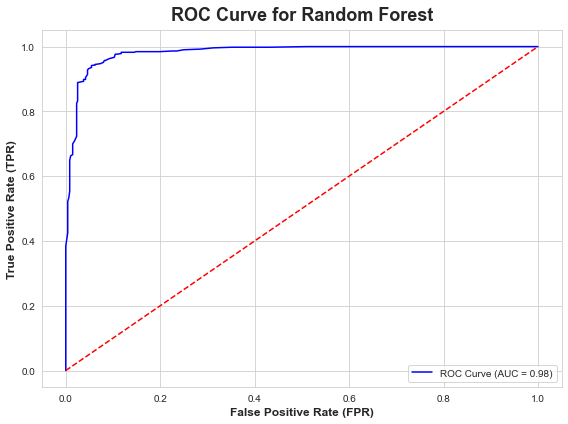

ROC AUC Score: 0.98


In [47]:
y_pred_prob = rf.predict_proba(x_val_scaled)[:, 1]  # Probability for class 1

# Compute ROC metrics
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.title('ROC Curve for Random Forest')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

print(f"ROC AUC Score: {roc_auc:.2f}")

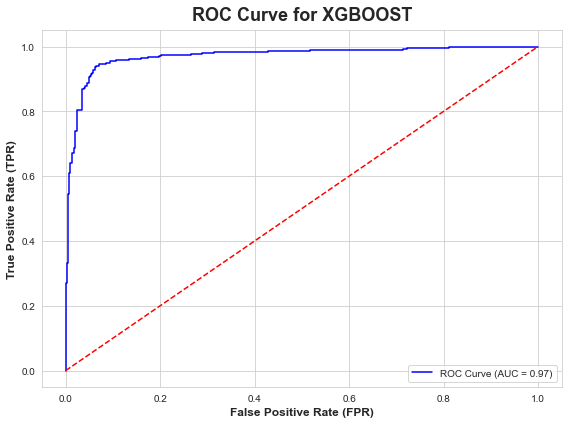

ROC AUC Score: 0.97


In [48]:
y_pred_prob = xgb.predict_proba(x_val_scaled)[:, 1]  # Probability for class 1

# Compute ROC metrics
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.title('ROC Curve for XGBOOST')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

print(f"ROC AUC Score: {roc_auc:.2f}")

#### According to previous results, The Random Forest Model can be select as the best model. 

## Deploy Random forest for Test Data set

In [49]:
test_df['winddirection'] = test_df['winddirection'].fillna(test_df['winddirection'].median())

In [50]:
final_df = test_df.drop(columns= ['id','maxtemp','mintemp','dewpoint'],axis=1)

In [51]:
x_test_scaled = mm.transform(final_df)

In [52]:
y_test_pred = rf.predict(x_test_scaled)

In [55]:
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'rainfall': y_test_pred 
})

In [57]:
submission_df.head(10)

,id,rainfall
0,2190,1
1,2191,1
2,2192,1
3,2193,0
4,2194,0
5,2195,1
6,2196,1
7,2197,1
8,2198,1
9,2199,1


In [ ]:
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'rainfall': y_test_pred 
})